In [1]:
# generic modules
import datetime, os
import itertools
import time
import pickle

# append working folder
import sys
# working_folder = './gdrive/My Drive/Teaching/CS4305TU Applied Machine Learning/SWMM/'
# sys.path.append(working_folder)


# basic data science modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# keras
from tensorflow.keras.layers import Input, Dense, SimpleRNN, GRU, LSTM, Flatten, Dropout, Bidirectional
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, LearningRateScheduler
# import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras import backend as K

# sklearn helper functions
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import scipy
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
import matplotlib

In [2]:
df_p_t = pd.read_csv("../data/raw/processed/tweets_protests_time_lag.csv")
df_p_t_state = pd.read_csv("../data/raw/processed/state_tp_time.csv")
df = df_p_t[['date','tweet_count', 'protest_count']]
df_state = df_p_t_state[['date','tweet_count', 'protest_count', "state"]]
df['state'] = 'USA'
df = pd.concat([df_state, df])
df.date = pd.to_datetime(df.date)

df.index = df.date
df = df.drop("date", axis=1)

C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


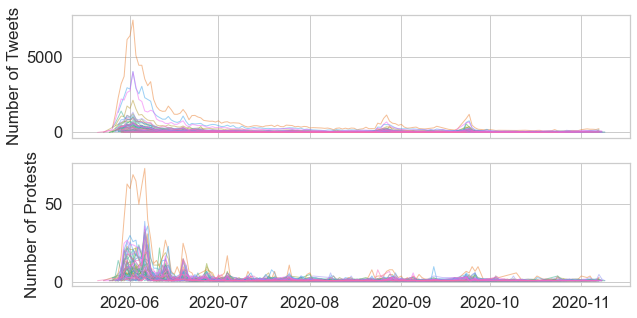

In [3]:
# tweets_geo = gpd.read_file("tweets_gdf_fs.geojson", driver="GeoJSON")
sns.set(style ="whitegrid", font_scale=1.5)
# preprocess protest and tweet data
# tweets_geo['created_at'] = pd.to_datetime(tweets_geo['created_at'])
# tweets_geo['tweet_count'] = 1
# tweets_geo['created_at_day'] = pd.to_datetime(tweets_geo['created_at'].dt.strftime('%Y-%m-%d'), format='%Y-%m-%d')

# df_p['EVENT_DATE'] = pd.to_datetime(df_p['EVENT_DATE'], format='%Y-%m-%d')
fig, ax = plt.subplots(2,1, figsize=(10,5))
g1 = sns.lineplot(ax = ax[0], data = df[df['state']!="USA"], x = 'date', y = 'tweet_count', linewidth = 1, hue="state", alpha=0.5)
g2 = sns.lineplot(ax = ax[1], data = df[df['state']!="USA"], x = 'date', y = 'protest_count', linewidth = 1, hue="state", alpha=0.5)

ax[0].set_xlabel("")
ax[1].set_xlabel("")
ax[0].set_ylabel("Number of Tweets", fontsize=17)
ax[1].set_ylabel("Number of Protests", fontsize=17)
ax[0].set(xticklabels=[])
ax[0].set(xlabel=None)
g1.legend_.remove()
g2.legend_.remove()

# ax[0].set_yscale("log")
# ax[1].set_yscale("log")

# ax[0].set_title("#JusticeForGeorgeFloyd tweets per 100,000 vs. Change in voter turnout", fontsize=14)
# ax[1].set_title("#JusticeForGeorgeFloyd protests per 100,000 vs. Change in voter turnout", fontsize=14)

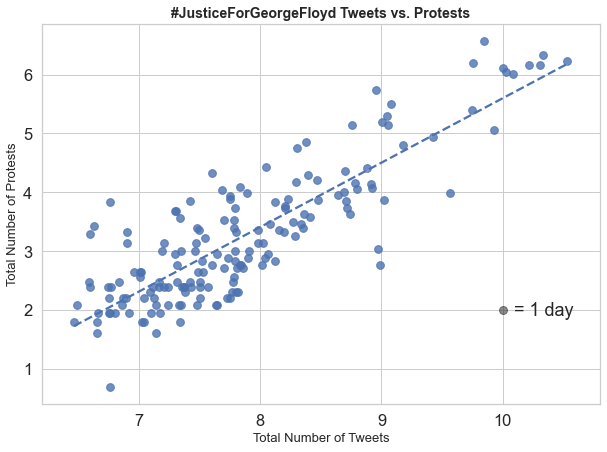

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.852
R^2 score = 0.726


In [4]:
fig, ax = plt.subplots(figsize=(10,7))

X = np.log(df[df['state']=="USA"]['tweet_count'][:, None])
y = np.log(df[df['state']=="USA"]['protest_count'][:, None])

# ax.set_yscale("log")
# ax.set_xscale("log")
ax = sns.regplot(data = df[df['state']=="USA"], x = X, y = y, scatter_kws={"s": 60}, ci=False)
# ax = sns.regplot(data = df_p_t, x = 'tweet_count', y = 'protest_count', scatter_kws={"s": 60}, ci=False)

ax.set(xlim=(6.2, 10.8))
# ax.set_xlim(2000,)

# ax.set_xlim(auto=True)

ax.lines[0].set_linestyle("--")

ax.set_xlabel("Total Number of Tweets", fontsize=13)
ax.set_ylabel("Total Number of Protests", fontsize=13)
ax.set_title("#JusticeForGeorgeFloyd Tweets vs. Protests", fontsize=14, fontweight="bold")

# regression metrics
slope, inercept, r_value, p_value, std_err = scipy.stats.linregress(X.reshape(-1), y[:, None].reshape(-1))

# annotations
style = dict(size=11)
# ax.annotate(f"Pearson Correlation = {r_value.round(3)}", xy=(6.5, 6), xytext=(6.5, 6), **style)
# ax.annotate(f"r2 = {(r_value**2).round(3)}", xy=(6.5, 5.7), xytext=(6.5, 5.7), **style)

# legend
ax.plot(10, 2, 'o',
        ms=8, mec='k', color="k", alpha=0.5)

ax.annotate(f" = 1 day", xy=(10.05, 1.9), xytext=(10.05, 1.9))


plt.show()

print("-"*110)
print(f"Pearson Correlation = {r_value.round(3)}")
print(f"R^2 score = {(r_value**2).round(3)}")

## Digital/physical activism index (county)

In [72]:
df_p_t_county = pd.read_csv("../data/raw/processed/counties_pt_time.csv", dtype={"GEOID": str})
df_p_t_county.date = pd.to_datetime(df_p_t_county.date)

In [73]:
# group county data by week
df_p_t_county['date_w'] = pd.to_datetime(df_p_t_county['date']) - pd.to_timedelta(7, unit='d')
df_p_t_w_county = df_p_t_county.groupby(['GEOID', pd.Grouper(key='date_w', freq='W-MON')])[['protest_count', 'tweet_count']].sum().reset_index().sort_values('date_w')

In [189]:
# len(df_p_t_county.GEOID.unique())

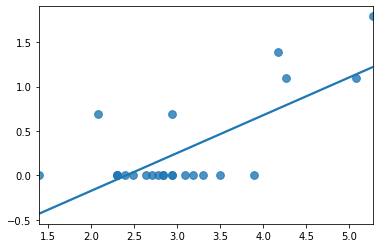

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.7287000160436514
R^2 score = 0.5310037133820178


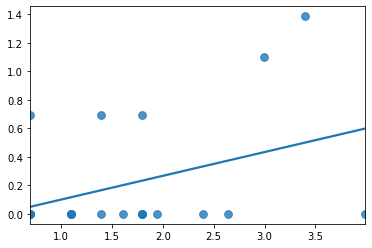

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.36944279237786404
R^2 score = 0.13648797683995356


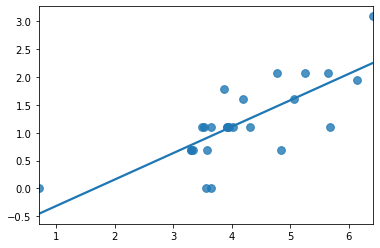

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.759991118663333
R^2 score = 0.5775865004471443


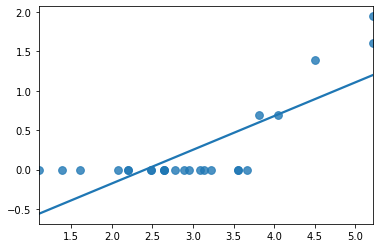

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.7923014623492797
R^2 score = 0.6277416072408071


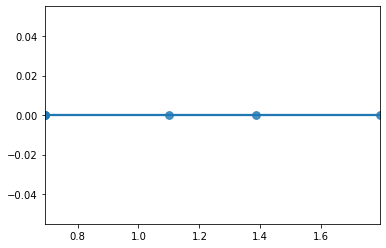

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.0
R^2 score = 0.0


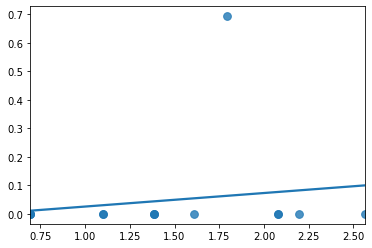

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.1629245291194438
R^2 score = 0.02654440218879249


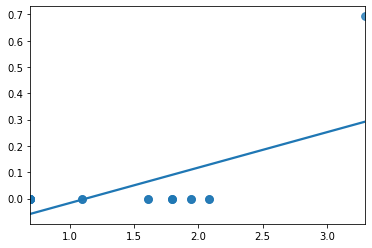

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.6253985307042982
R^2 score = 0.391123322207095


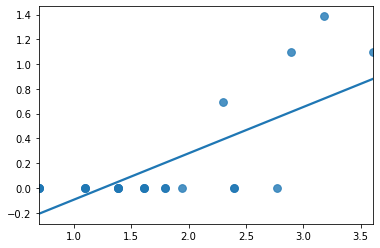

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.7281792595594162
R^2 score = 0.5302450340524997


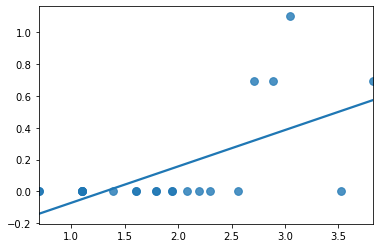

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.6248631918585191
R^2 score = 0.3904540085396165


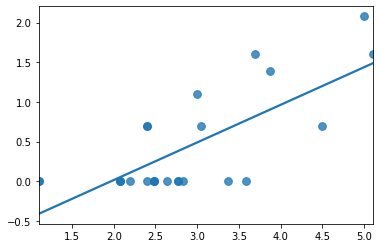

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.7376059153160757
R^2 score = 0.5440624863092658


In [111]:
# df_p_t_w_county = df_p_t_w_county.replace(np.NaN, "0")
# df_p_t_w_county['protest_count'] = pd.to_numeric(df_p_t_w_county['protest_count'])
for county in df_p_t_w_county.sample(10).GEOID.unique():

#     data = df_p_t_county.replace(np.NaN, "0")[(df_p_t_county['GEOID']==county)&(df_p_t_county['tweet_count'].isna()==False)&(df_p_t_county['protest_count'].isna()==False)]
#     data = df_p_t_w_county[(df_p_t_w_county['GEOID']==county)&(df_p_t_w_county['tweet_count']!=0)&(df_p_t_w_county['protest_count']!=0)]
    data = df_p_t_w_county[(df_p_t_w_county['GEOID']==county)]
    X = np.log1p(data['tweet_count'][:, None])
    y = np.log1p(data['protest_count'][:, None])

    # ax.set_yscale("log")
    # ax.set_xscale("log")
    ax = sns.regplot(x = X, y = y, scatter_kws={"s": 60}, ci=False)
    # ax = sns.regplot(data = df_p_t, x = 'tweet_count', y = 'protest_count', scatter_kws={"s": 60}, ci=False)

#     ax.set(xlim=(6.2, 10.8))
    # ax.set_xlim(2000,)

    # ax.set_xlim(auto=True)

#     ax.lines[0].set_linestyle("--")

#     ax.set_xlabel("Total Number of Tweets", fontsize=13)
#     ax.set_ylabel("Total Number of Protests", fontsize=13)
#     ax.set_title("#JusticeForGeorgeFloyd Tweets vs. Protests", fontsize=14, fontweight="bold")

    # regression metrics
    slope, inercept, r_value, p_value, std_err = scipy.stats.linregress(X.reshape(-1), y[:, None].reshape(-1))

    # annotations
#     style = dict(size=11)
    # ax.annotate(f"Pearson Correlation = {r_value.round(3)}", xy=(6.5, 6), xytext=(6.5, 6), **style)
    # ax.annotate(f"r2 = {(r_value**2).round(3)}", xy=(6.5, 5.7), xytext=(6.5, 5.7), **style)

    # legend
#     ax.plot(10, 2, 'o',
#             ms=8, mec='k', color="k", alpha=0.5)

#     ax.annotate(f" = 1 day", xy=(10.05, 1.9), xytext=(10.05, 1.9))


    plt.show()

    print("-"*110)
    print(f"Pearson Correlation = {r_value}")
    print(f"R^2 score = {(r_value**2)}")

#### index data-set for weekly county values

In [170]:
# df_p_t_w_county = df_p_t_w_county.replace(np.NaN, "0")
# df_p_t_w_county['protest_count'] = pd.to_numeric(df_p_t_w_county['protest_count'])
slopes = []
intercepts = []
r_values = []
r2_values = []
p_values = []
std_errs = []
counties = []
num_dtpts = []

# for county in df_p_t_w_county.sample(10).GEOID.unique():
for county in df_p_t_w_county.GEOID.unique():

#     data = df_p_t_county.replace(np.NaN, "0")[(df_p_t_county['GEOID']==county)&(df_p_t_county['tweet_count'].isna()==False)&(df_p_t_county['protest_count'].isna()==False)]
#     data = df_p_t_w_county[(df_p_t_w_county['GEOID']==county)&(df_p_t_w_county['tweet_count']!=0)&(df_p_t_w_county['protest_count']!=0)]
    data = df_p_t_w_county[(df_p_t_w_county['GEOID']==county)]
    X = np.log1p(data['tweet_count'][:, None])
    y = np.log1p(data['protest_count'][:, None])
    
    dtpts = len(data)
    # regression metrics
    slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X.reshape(-1), y[:, None].reshape(-1))

#     print("-"*110)
#     print(f"Pearson Correlation = {r_value}")
#     print(f"R^2 score = {(r_value**2)}")
    
    slopes.append(slope)
    intercepts.append(intercept)
    r_values.append(r_value)
    r2_values.append(r_value**2)
    p_values.append(p_value)
    std_errs.append(std_err)
    counties.append(county)
    num_dtpts.append(dtpts)
    
corrs_dict = {"GEOID": counties, "slope": slopes, "intercept": intercepts, "r_value": r_values, "r2_value": r2_values, "p_value": p_values, "std_err": std_errs, "num_dtpts":num_dtpts}
county_corrs_df = pd.DataFrame.from_dict(corrs_dict)

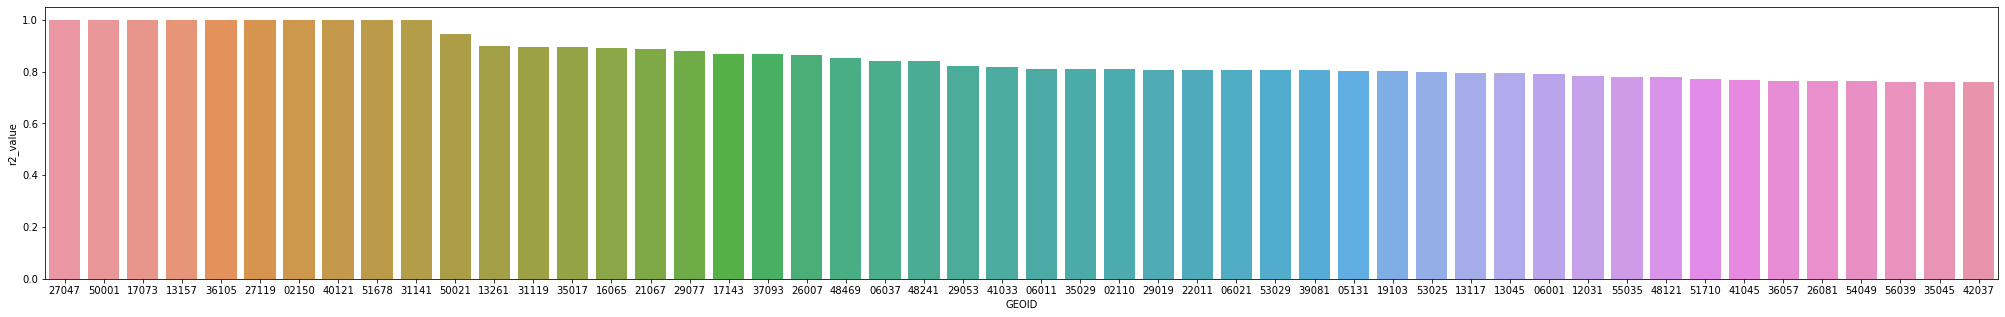

In [178]:
fig, ax = plt.subplots(figsize=(35, 5))
ax = sns.barplot(data = county_corrs_df[(county_corrs_df['r2_value']!=0)&(county_corrs_df['num_dtpts']>=4)].sort_values("r2_value", ascending=False).head(50), x="GEOID", y='r2_value')

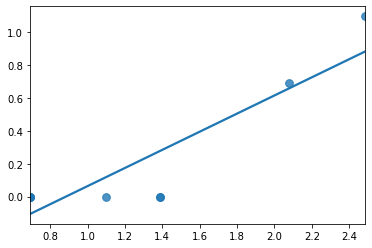

In [180]:
data = df_p_t_w_county[(df_p_t_w_county['GEOID']=="39081")]
X = np.log1p(data['tweet_count'][:, None])
y = np.log1p(data['protest_count'][:, None])

# ax.set_yscale("log")
# ax.set_xscale("log")
ax = sns.regplot(x = X, y = y, scatter_kws={"s": 60}, ci=False)

In [184]:
county_corrs_df.to_csv("../data/raw/processed/county_corrs_df.csv")

C:\Users\Leonardo\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


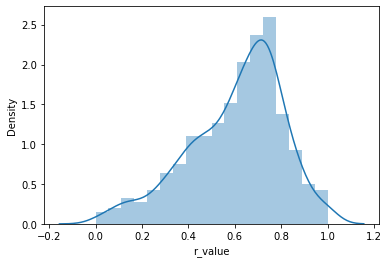

In [197]:
sns.distplot(county_corrs_df[county_corrs_df['r_value']>0]['r_value'])

In [199]:
df_p_t_w_county.to_csv("../data/raw/processed/counties_pt_w_time.csv")

#### index data-set for daily county values

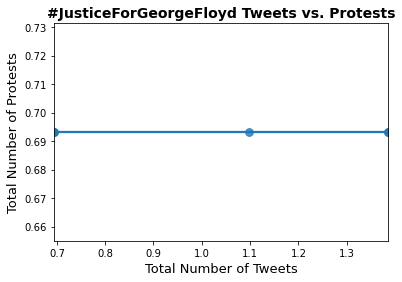

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.0
R^2 score = 0.0


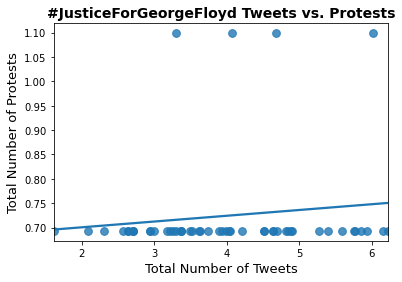

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.12679343044557675
R^2 score = 0.01607657400415731


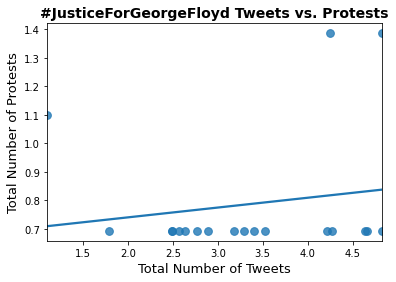

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.16058768897347714
R^2 score = 0.02578840584984223


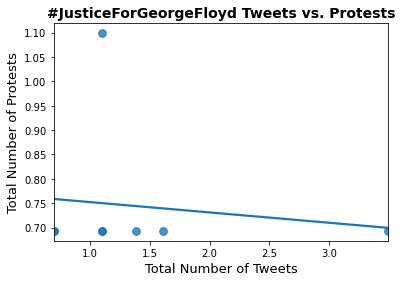

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = -0.13338917517104615
R^2 score = 0.017792672052812035


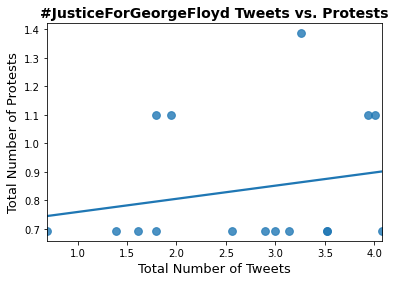

--------------------------------------------------------------------------------------------------------------
Pearson Correlation = 0.20792597310182295
R^2 score = 0.04323321029034


ValueError: Inputs must not be empty.

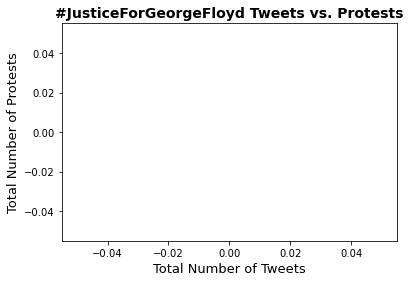

In [68]:
df_p_t_county = df_p_t_county.replace(np.NaN, "0")
df_p_t_county['protest_count'] = pd.to_numeric(df_p_t_county['protest_count'])
for county in df_p_t_county.sample(10).GEOID.unique():

#     data = df_p_t_county.replace(np.NaN, "0")[(df_p_t_county['GEOID']==county)&(df_p_t_county['tweet_count'].isna()==False)&(df_p_t_county['protest_count'].isna()==False)]
    data = df_p_t_county[(df_p_t_county['GEOID']==county)&(df_p_t_county['tweet_count']!=0)&(df_p_t_county['protest_count']!=0)]
    X = np.log1p(data['tweet_count'][:, None])
    y = np.log1p(data['protest_count'][:, None])

    # ax.set_yscale("log")
    # ax.set_xscale("log")
    ax = sns.regplot(x = X, y = y, scatter_kws={"s": 60}, ci=False)
    # ax = sns.regplot(data = df_p_t, x = 'tweet_count', y = 'protest_count', scatter_kws={"s": 60}, ci=False)

#     ax.set(xlim=(6.2, 10.8))
    # ax.set_xlim(2000,)

    # ax.set_xlim(auto=True)

#     ax.lines[0].set_linestyle("--")

    ax.set_xlabel("Total Number of Tweets", fontsize=13)
    ax.set_ylabel("Total Number of Protests", fontsize=13)
    ax.set_title("#JusticeForGeorgeFloyd Tweets vs. Protests", fontsize=14, fontweight="bold")

    # regression metrics
    slope, inercept, r_value, p_value, std_err = scipy.stats.linregress(X.reshape(-1), y[:, None].reshape(-1))

    # annotations
    style = dict(size=11)
    # ax.annotate(f"Pearson Correlation = {r_value.round(3)}", xy=(6.5, 6), xytext=(6.5, 6), **style)
    # ax.annotate(f"r2 = {(r_value**2).round(3)}", xy=(6.5, 5.7), xytext=(6.5, 5.7), **style)

    # legend
#     ax.plot(10, 2, 'o',
#             ms=8, mec='k', color="k", alpha=0.5)

#     ax.annotate(f" = 1 day", xy=(10.05, 1.9), xytext=(10.05, 1.9))


    plt.show()

    print("-"*110)
    print(f"Pearson Correlation = {r_value}")
    print(f"R^2 score = {(r_value**2)}")

In [40]:
np.log(data['protest_count'])

1145     1
1146     1
1147     1
1148     2
1149     1
        ..
16713    0
16714    0
16715    0
16716    0
16717    0
Name: protest_count, Length: 127, dtype: object

## Correlated Time Series Analysis

In [54]:
import warnings
warnings.filterwarnings("ignore")

C:\Users\Leonardo\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  "anyway, n=%i" % int(n))
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Leonardo\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Leonardo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDepreca

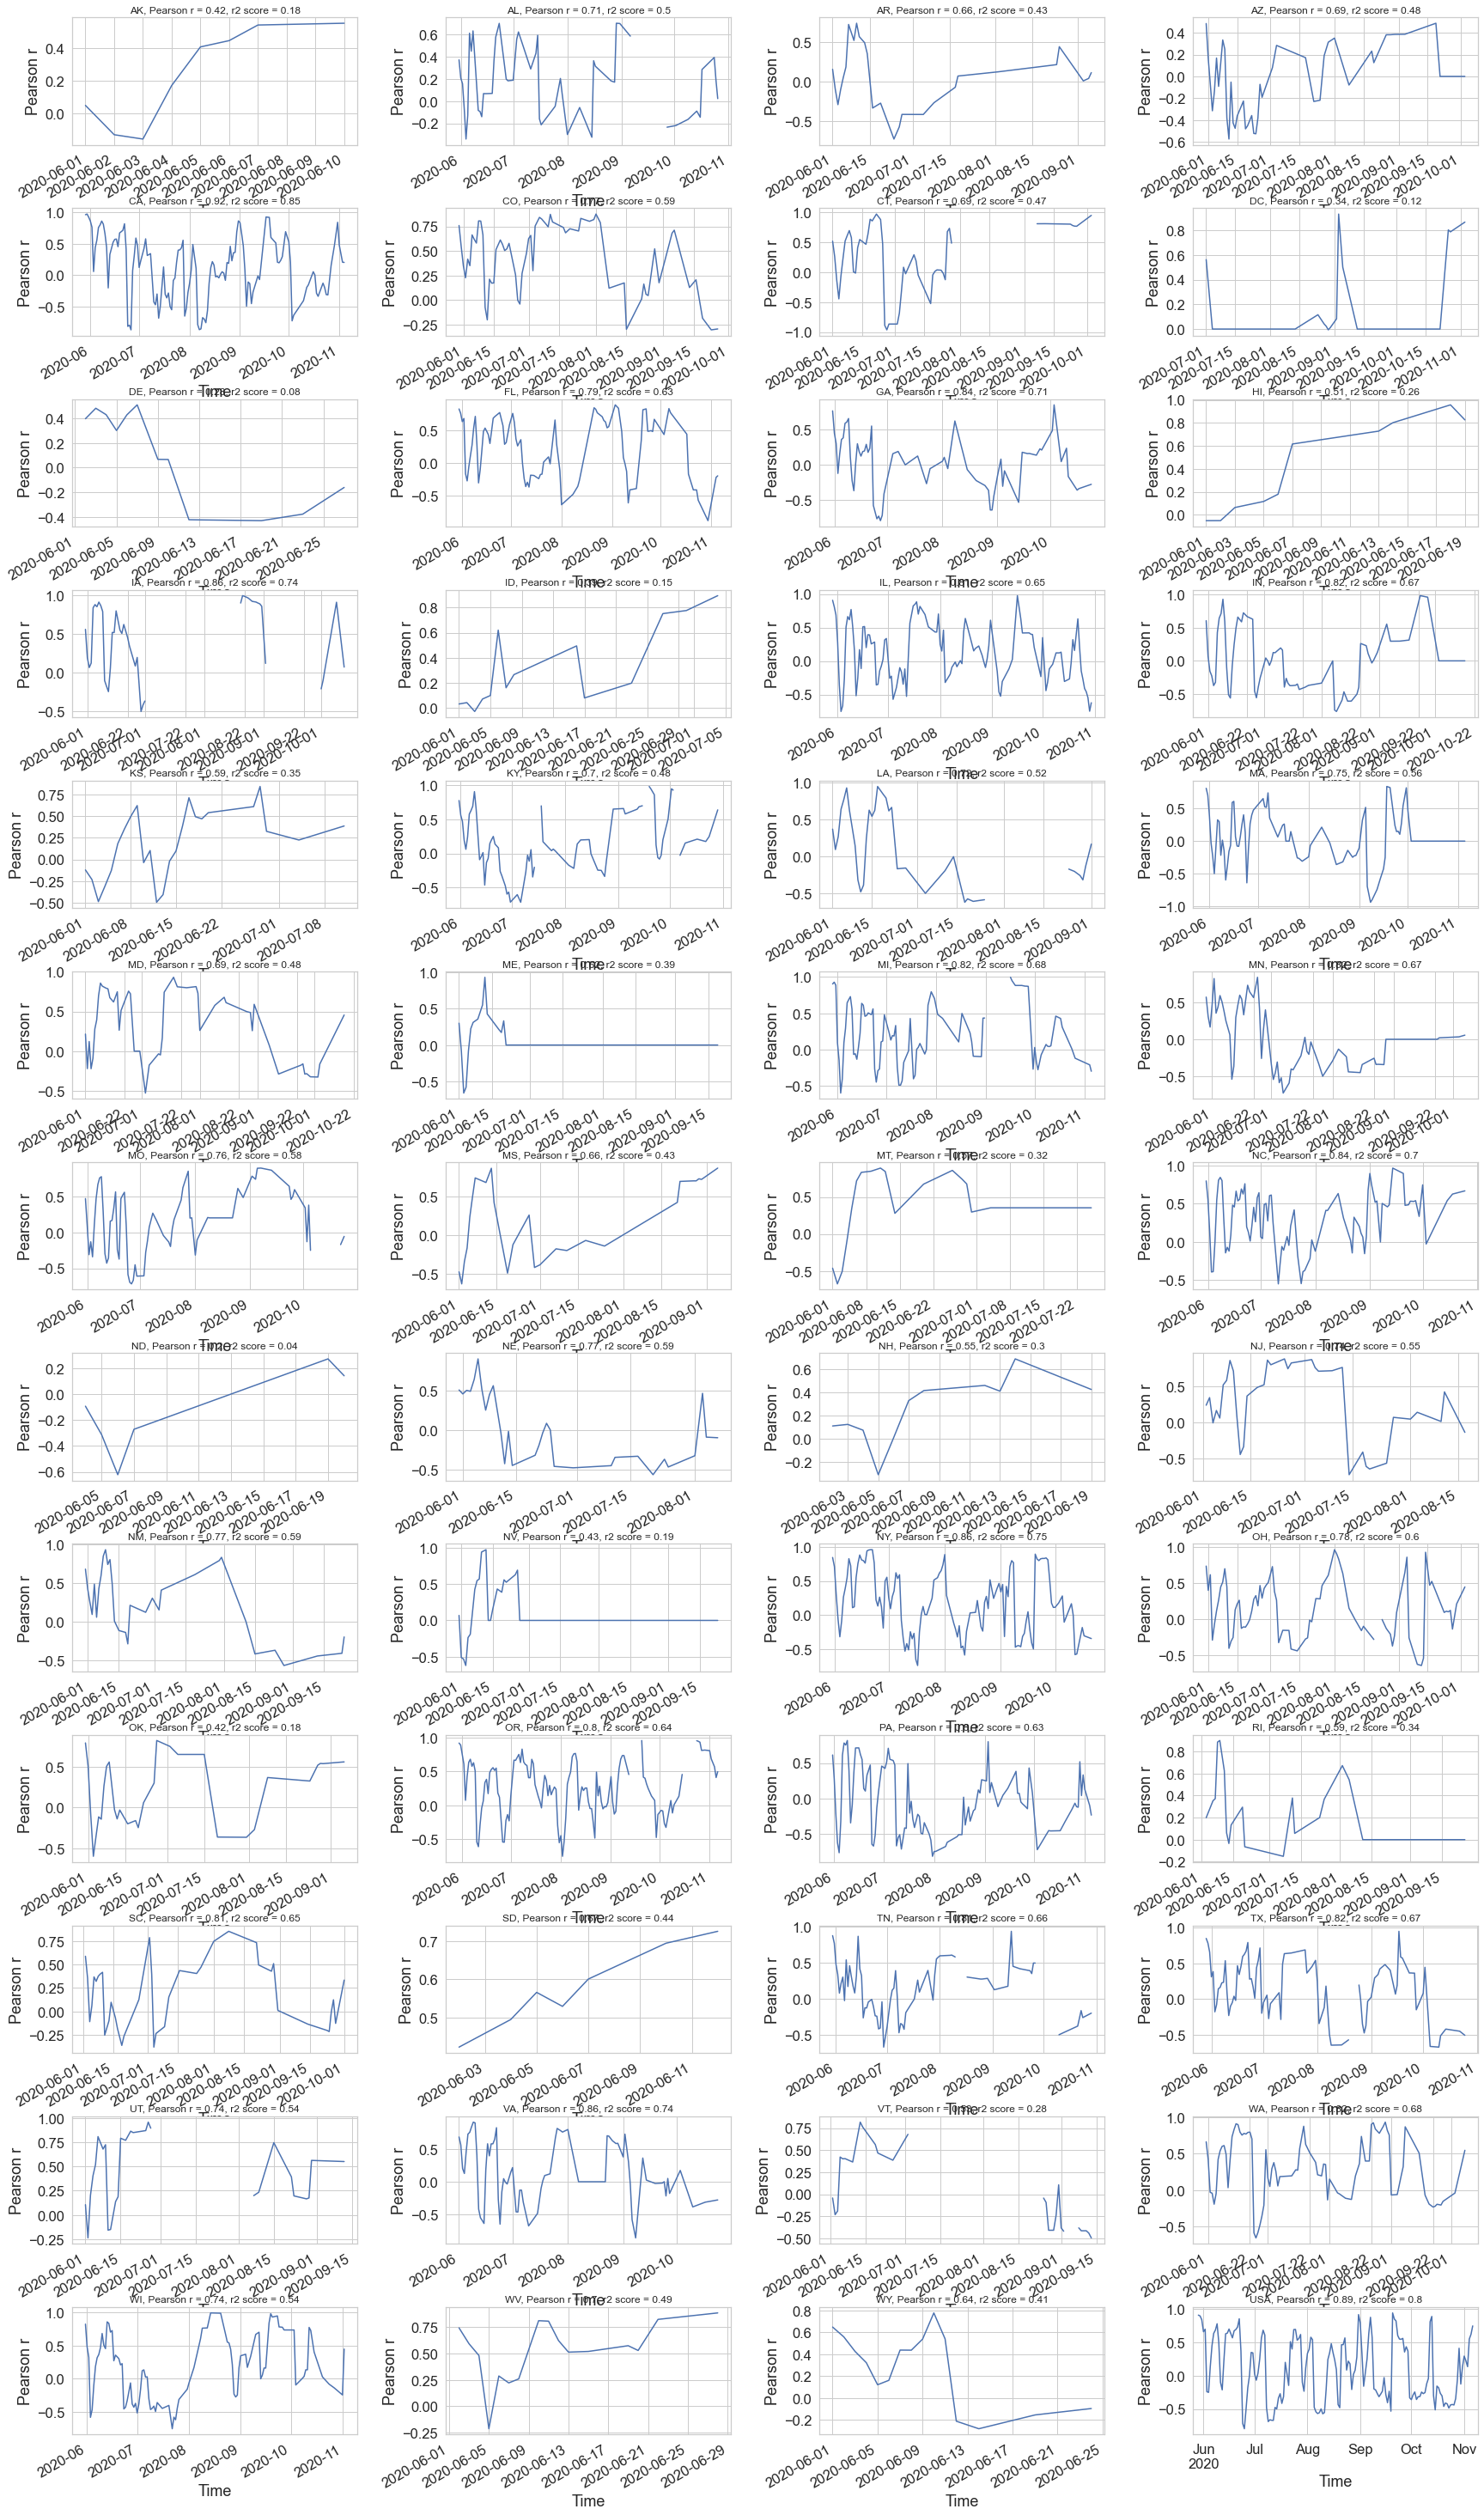

In [24]:
t_p = []
p_p = []
t_stat = []
p_stat = []
states = []
t_result = []
p_result = []

p_value = []
pearson_r = []
r2 = []

scaler = MinMaxScaler()

fig, axes = plt.subplots(13, 4, figsize=(25,50))
# fig.suptitle('3 rows x 4 columns axes with no data')
ax_num = 0
r_window_size = 7

fig.tight_layout(pad=6.0)

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

axes = axes.flatten()

for state in df['state'].unique():
    
    data = df[df['state']==state]
    states.append(state)
    # check distributions
    stat, p = stats.normaltest(data['tweet_count'])
    t_p.append(p)
    t_stat.append(stat)

    alpha = 0.05
    if p > alpha:
        t_result.append('Tweet data looks Gaussian (fail to reject null hypothesis)')
    else:
        t_result.append('Tweet data looks non-Gaussian (reject null hypothesis)')

    stat, p = stats.normaltest(data['protest_count'])
    p_p.append(p)
    p_stat.append(stat)
    
    alpha = 0.05
    if p> alpha:
        p_result.append('Protest data looks Gaussian (fail to reject null hypothesis)')
    else:
        p_result.append('Protest data looks non-Gaussian (reject null hypothesis)')
        
    data['tweet_count'] = scaler.fit_transform(data[['tweet_count']])
    data['protest_count'] = scaler.fit_transform(data[['protest_count']])

    # plot data

    r, p = stats.pearsonr(data.dropna()['tweet_count'], data.dropna()['protest_count'])
    
    p_value.append(p)
    pearson_r.append(r)
    r2.append(r**2)
    
    # Compute rolling window moving window synchrony.
#     f,ax=plt.subplots(figsize=(7,3))
#     df.rolling(window=1,center=True).median().plot(ax=axes[ax_num])
#     ax.set(xlabel='Time',ylabel='Pearson r')
#     ax.set(title=f"Pearson r = {np.round(r,2)}, r2 score = {np.round(r**2,2)}");

    # Interpolate missing data.
    df_interpolated = data.interpolate()
    # Compute rolling window synchrony
    rolling_r = df_interpolated['tweet_count'].rolling(window=r_window_size, center=True).corr(df_interpolated['protest_count'])
#     f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
#     data.rolling(window=1,center=True).median().plot(ax=ax[ax_num])
#     ax[0].set(xlabel='Time',ylabel='Tweets/protests')
    rolling_r.plot(ax=axes[ax_num])
    axes[ax_num].set(xlabel='Time',ylabel='Pearson r', title=f"{state}, Pearson r = {np.round(r,2)}, r2 score = {np.round(r**2,2)}")
    
#     plt.suptitle(f"Smiling data and rolling window correlation for {state}, overall metrics: Pearson r = {np.round(r,2)}, r2 score = {np.round(r**2,2)}")
    

    ax_num +=1
    
stat_dict = {"state": states, "tweet_pvalue": t_p, "protest_pvalue": p_p, "tweet_statistic": t_stat, 
             "protest_statistic": p_stat, "tweet_normresult": t_result, "protest_normresult": p_result, 
             "corr_p_value": p_value, "pearson_r": pearson_r, "r2": r2}

stat_df = pd.DataFrame.from_dict(stat_dict)

plt.savefig("../reports/figures/rollw_corr_state.png", dpi=300)
#         facecolor='w', edgecolor='w',
#         orientation='portrait', papertype=None, format=None,
#         transparent=False, bbox_inches=None, pad_inches=0.1,
#         frameon=None, metadata=None)

In [135]:
stat_df.to_csv("../data/raw/processed/stat_tests/state_normtest_corr_results.csv")

In [26]:
stat_df = pd.read_csv("../data/raw/processed/stat_tests/state_normtest_corr_results.csv")

In [79]:
print("Across 51 states, the median Pearson correlation value is", stat_df.pearson_r.median(), "and there are", len(stat_df[stat_df['pearson_r']>0.6]), "states associated with Pearson correlation values greater than 0.7.")
print("Across 51 states, the median R2 value is", stat_df.r2.median(), "and there are", len(stat_df[stat_df['r2']>0.4]), "states associated with Pearson correlation values greater than 0.4.")

Across 51 states, the median Pearson correlation value is 0.7352699934430136 and there are 38 states associated with Pearson correlation values greater than 0.7.
Across 51 states, the median R2 value is 0.5406219632576892 and there are 37 states associated with Pearson correlation values greater than 0.4.


Across 51 states, the median R2 value is 0.5411586754726005 and there are 38 states associated with Pearson correlation values greater than 0.4.


In [50]:
import geopandas as gpd
state_pop = pd.read_csv("../data/raw/us_admin/nst-est2019-alldata.csv")

In [51]:
state_geo = gpd.read_file("../data/raw/us_admin/cb_2018_us_state_500k.shp")

In [64]:
# state_geo

In [75]:
states_pop = pd.merge(state_geo, state_pop, on="NAME")[["STUSPS", "ALAND", 'POPESTIMATE2019']].rename({"STUSPS": "state"}, axis=1)
stat_df = pd.merge(states_pop, stat_df)
stat_df['pop_den'] = stat_df['POPESTIMATE2019']/stat_df['ALAND']

In [81]:
print("Across the 20 densest states, the median Pearson correlation value is", stat_df.sort_values("pop_den", ascending=False).head(20).pearson_r.median(), "and there are", len(stat_df.sort_values("pop_den", ascending=False).head(20)[stat_df.sort_values("pop_den", ascending=False).head(20)['pearson_r']>0.6]), "states associated with Pearson correlation values greater than 0.7.")
print("Across the 20 densest states, the median R2 value is", stat_df.sort_values("pop_den", ascending=False).head(20).r2.median(), "and there are", len(stat_df.sort_values("pop_den", ascending=False).head(20)[stat_df.sort_values("pop_den", ascending=False).head(20)['r2']>0.5]), "states associated with Pearson correlation values greater than 0.4.")

Across the 20 densest states, the median Pearson correlation value is 0.7943676574064071 and there are 16 states associated with Pearson correlation values greater than 0.7.
Across the 20 densest states, the median R2 value is 0.6310224474822521 and there are 14 states associated with Pearson correlation values greater than 0.4.


In [78]:
stat_df.sort_values("pop_den", ascending=False).head(20)

state         ALAND  POPESTIMATE2019  Unnamed: 0  tweet_pvalue  \
35    DC     158340391           705749           7  1.008180e-10   
36    NJ   19047825980          8882190          31  3.130358e-05   
41    RI    2677779902          1059361          39  9.306232e-06   
7     MA   20205125364          6892503          19  2.262054e-14   
50    CT   12542497068          3565287           6  8.280472e-08   
37    MD   25151100280          6045680          20  1.023049e-05   
40    DE    5045925646           973764           8  5.411517e-01   
24    NY  122049149763         19453561          34  3.168423e-20   
9     FL  138949136250         21477737           9  1.135381e-14   
18    PA  115884442321         12801989          38  2.293232e-16   
43    OH  105828882568         11689100          35  5.095350e-12   
15    CA  403503931312         39512223           4  1.872916e-25   
28    IL  143780567633         12671821          14  1.582854e-17   
39    HI   16633990195          1415872          11  2.476669e-01   
3     VA  102257717110          8535519          45  5.251012e-10   
1     NC  125923656064         10488084          27  1.947976e-12   
48    IN   92789302676          6732219          15  4.490780e-09   
17    GA  149482048342         10617423          10  3.821007e-07   
6     MI  146600952990          9986857          22  8.561304e-16   
32    SC   77864918488          5148714          40  7.990403e-07   

    protest_pvalue  tweet_statistic  protest_statistic  \
35    5.068078e-06        46.035409          24.385098   
36    3.505198e-08        20.743556          34.332868   
41    2.272392e-07        23.169653          30.594526   
7     2.689116e-13        62.839836          57.888788   
50    3.759867e-16        32.613561          71.033956   
37    1.893811e-09        22.980276          40.169350   
40    1.504093e-02         1.228111           8.393961   
24    1.463837e-20        89.796936          91.341282   
9     2.269819e-11        64.218446          49.017472   
18    1.090118e-19        72.022799          87.325662   
43    8.436648e-19        52.005385          83.233063   
15    4.257789e-25       113.874261         112.231755   
28    4.070883e-20        77.369435          89.295684   
39    8.909924e-03         2.791341           9.441179   
3     2.819072e-10        42.734860          43.978886   
1     2.649227e-15        53.928460          67.129017   
48    4.375861e-11        38.442479          47.704666   
17    6.113169e-10        29.555163          42.430811   
6     1.142835e-16        69.388218          73.415699   
32    1.036216e-04        28.079709          18.349530   

                                     tweet_normresult  \
35  Tweet data looks non-Gaussian (reject null hyp...   
36  Tweet data looks non-Gaussian (reject null hyp...   
41  Tweet data looks non-Gaussian (reject null hyp...   
7   Tweet data looks non-Gaussian (reject null hyp...   
50  Tweet data looks non-Gaussian (reject null hyp...   
37  Tweet data looks non-Gaussian (reject null hyp...   
40  Tweet data looks Gaussian (fail to reject null...   
24  Tweet data looks non-Gaussian (reject null hyp...   
9   Tweet data looks non-Gaussian (reject null hyp...   
18  Tweet data looks non-Gaussian (reject null hyp...   
43  Tweet data looks non-Gaussian (reject null hyp...   
15  Tweet data looks non-Gaussian (reject null hyp...   
28  Tweet data looks non-Gaussian (reject null hyp...   
39  Tweet data looks Gaussian (fail to reject null...   
3   Tweet data looks non-Gaussian (reject null hyp...   
1   Tweet data looks non-Gaussian (reject null hyp...   
48  Tweet data looks non-Gaussian (reject null hyp...   
17  Tweet data looks non-Gaussian (reject null hyp...   
6   Tweet data looks non-Gaussian (reject null hyp...   
32  Tweet data looks non-Gaussian (reject null hyp...   

                                   protest_normresult  corr_p_value  \
35  Protest data looks non-Gaussian (reject null h...  4.019969e-

#### Check data distributions

In [58]:
stat,p = stats.normaltest(df['tweet_count'])
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Tweet data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Tweet data looks non-Gaussian (reject null hypothesis)')
# output: Statistics = 658.293, p=0.000 Data looks Gaussian (reject null hypothesis

Statistics = 135.797, p=0.000
Tweet data looks non-Gaussian (reject null hypothesis)


In [59]:
from scipy import stats
stat,p = stats.normaltest(df['protest_count'])
print("Statistics = %.3f, p=%.3f" % (stat,p))
alpha = 0.05
if p> alpha:
    print('Protest data looks Gaussian (fail to reject null hypothesis)')
else:
    print('Protest data looks non-Gaussian (reject null hypothesis)')
# output: Statistics = 658.293, p=0.000 Data looks Gaussian (reject null hypothesis

Statistics = 154.165, p=0.000
Protest data looks non-Gaussian (reject null hypothesis)


#### 1. Pearson Correlation

In [5]:
scaler = MinMaxScaler()
# normalized
df['tweet_count'] = scaler.fit_transform(df[['tweet_count']])
df['protest_count'] = scaler.fit_transform(df[['protest_count']])

Pandas computed Pearson r: 0.8940668936521207
Scipy computed Pearson r: 0.8940668936521191 and p-value: 8.722845171050529e-60


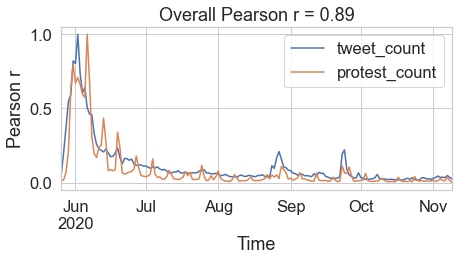

In [6]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

overall_pearson_r = df[df['state']=="USA"].corr().iloc[0,1]
print(f"Pandas computed Pearson r: {overall_pearson_r}")
# out: Pandas computed Pearson r: 0.2058774513561943

r, p = stats.pearsonr(df[df['state']=="USA"].dropna()['tweet_count'], df[df['state']=="USA"].dropna()['protest_count'])
print(f"Scipy computed Pearson r: {r} and p-value: {p}")
# out: Scipy computed Pearson r: 0.20587745135619354 and p-value: 3.7902989479463397e-51

# Compute rolling window synchrony
f,ax=plt.subplots(figsize=(7,3))
df[df['state']=="USA"].rolling(window=1,center=True).median().plot(ax=ax)
ax.set(xlabel='Time',ylabel='Pearson r')
ax.set(title=f"Overall Pearson r = {np.round(overall_pearson_r,2)}");

C:\Users\Leonardo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Leonardo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
C:\Users\Leonardo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
C:\Users\Leonardo\Anaconda3\lib\site-packages\pandas\plo

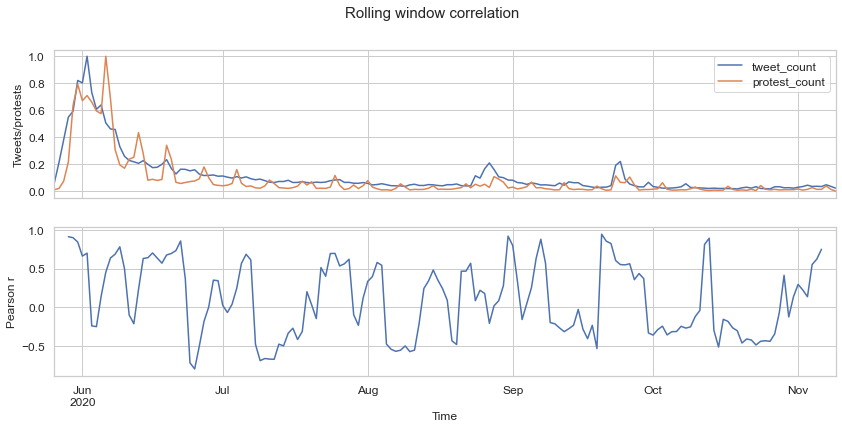

In [25]:
# Set window size to compute moving window synchrony.
r_window_size = 7
# Interpolate missing data.
df_interpolated = df[df['state']=="USA"].interpolate()
# Compute rolling window synchrony
rolling_r = df_interpolated['tweet_count'].rolling(window=r_window_size, center=True).corr(df_interpolated['protest_count'])
f,ax=plt.subplots(2,1,figsize=(14,6),sharex=True)
df[df['state']=="USA"].rolling(window=1,center=True).median().plot(ax=ax[0])
ax[0].set(xlabel='Time',ylabel='Tweets/protests')
rolling_r.plot(ax=ax[1])
ax[1].set(xlabel='Time',ylabel='Pearson r')
plt.suptitle("Rolling window correlation")
plt.savefig("../reports/figures/2_rollingWindowTot.PNG", dpi=300)

#### 2. Time Lagged Cross Correlation

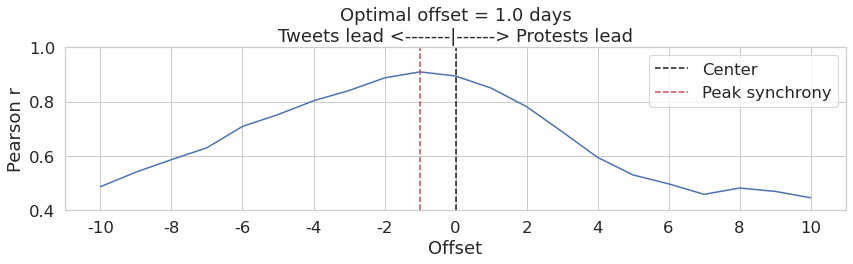

In [101]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))
    


d1 = df[df['state']=="USA"]['tweet_count']
d2 = df[df['state']=="USA"]['protest_count']
days = 10
rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
offset = np.floor(len(rs)/2)-np.argmax(rs)
f,ax=plt.subplots(figsize=(14,3))
ax.plot(rs)
ax.axvline(np.ceil((len(rs)-1)/2), color='k',linestyle='--',label='Center')
ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
ax.set(title=f'Optimal offset = {offset} days\nTweets lead <-------|------> Protests lead',ylim=[0.4,1], xlabel='Offset',ylabel='Pearson r')
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
ax.set_xticklabels([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10,]);
plt.legend()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

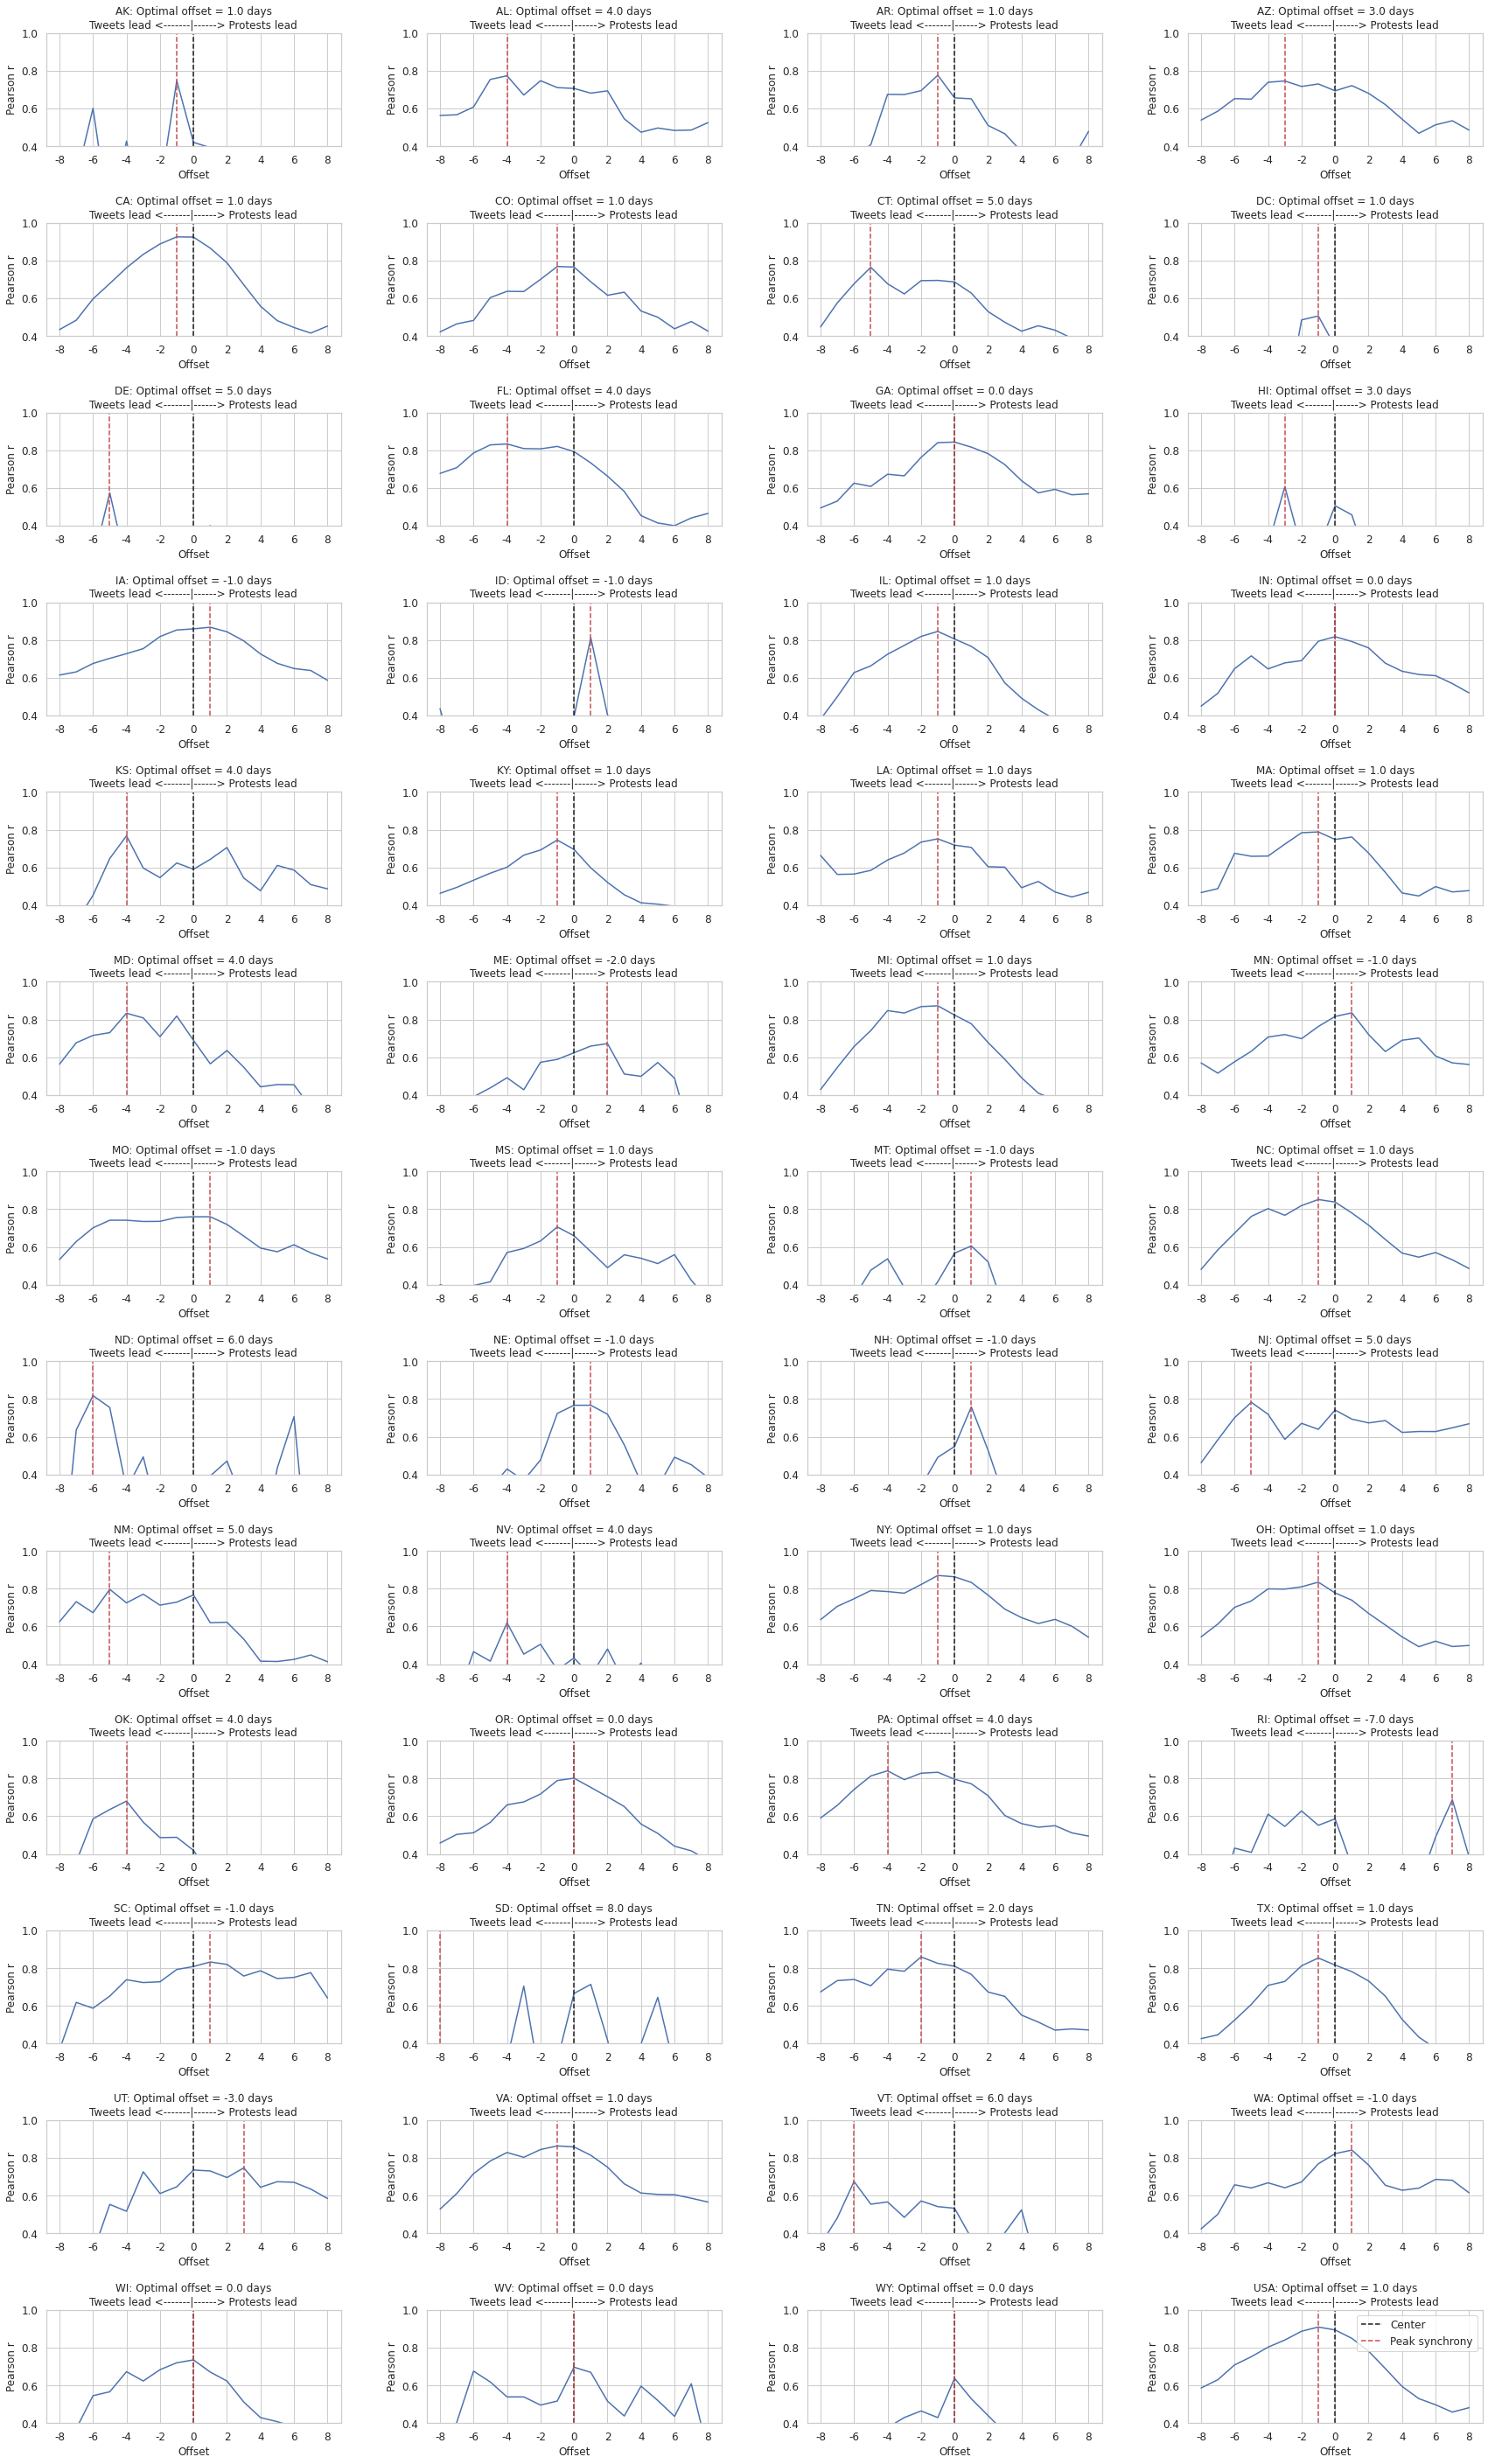

In [139]:
fig, axes = plt.subplots(13, 4, figsize=(25,40))
# fig.suptitle('3 rows x 4 columns axes with no data')
fig.tight_layout(pad=5.0)

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

ax_num = 0

axes = axes.flatten()

for state in df['state'].unique():
    
    data = df[df['state']==state]
    d1 = data['tweet_count']
    d2 = data['protest_count']
    days = 8
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
    offset = np.floor(len(rs)/2)-np.argmax(rs)
#     f,ax=plt.subplots(figsize=(14,3))
    axes[ax_num].plot(rs)
    axes[ax_num].axvline(np.ceil((len(rs)-1)/2), color='k',linestyle='--',label='Center')
    axes[ax_num].axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    axes[ax_num].set(title=f'{state}: Optimal offset = {offset} days\nTweets lead <-------|------> Protests lead',ylim=[0.4,1], xlabel='Offset',ylabel='Pearson r')
    axes[ax_num].set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16])
    axes[ax_num].set_xticklabels([-8, -6, -4, -2, 0, 2, 4, 6, 8]);
    plt.legend()
    
    ax_num +=1
    
plt.savefig("../reports/figures/tlcross_corr_state.png", dpi=300)

#### Notes
- In 41 out of 51 states a better correlation is obtained when tweets lead by 1 or more days
- In all states, the highest correlations are obtained when levels of tweeting and protesting are above average (peak anomalies), but on "regular" days we obtain lower correlations. 

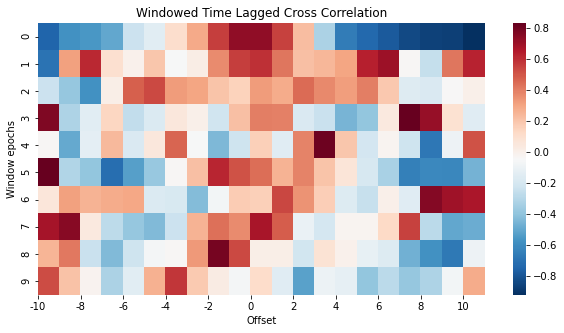

In [64]:
# Windowed time lagged cross correlation
days = 10
no_splits = 10
samples_per_split = df.shape[0]/no_splits
rss=[]
for t in range(0, no_splits):
    d1 = df['tweet_count'][int((t)*samples_per_split):int((t+1)*samples_per_split)]
    d2 = df['protest_count'][int((t)*samples_per_split):int((t+1)*samples_per_split)]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
    rss.append(rs)
rss = pd.DataFrame(rss)
f,ax = plt.subplots(figsize=(10,5))
sns.heatmap(rss,cmap='RdBu_r',ax=ax)
ax.set(title=f'Windowed Time Lagged Cross Correlation', xlabel='Offset',ylabel='Window epochs')
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20])
ax.set_xticklabels([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10,]);

# # Rolling window time lagged cross correlation
# days = 10
# window_size = 10 #samples
# t_start = 0
# t_end = t_start + window_size
# step_size = 30
# rss=[]
# while t_end < 5400:
#     d1 = df['S1_Joy'].iloc[t_start:t_end]
#     d2 = df['S2_Joy'].iloc[t_start:t_end]
#     rs = [crosscorr(d1,d2, lag, wrap=False) for lag in range(-int(days),int(days+1))]
#     rss.append(rs)
#     t_start = t_start + step_size
#     t_end = t_end + step_size
# rss = pd.DataFrame(rss)

# f,ax = plt.subplots(figsize=(10,10))
# sns.heatmap(rss,cmap='RdBu_r',ax=ax)
# ax.set(title=f'Rolling Windowed Time Lagged Cross Correlation',xlim=[0,301], xlabel='Offset',ylabel='Epochs')
# ax.set_xticks([0, 50, 100, 151, 201, 251, 301])
# ax.set_xticklabels([-150, -100, -50, 0, 50, 100, 150]);

#### 3. Dynamic Time Warping — synchrony of signals varying in lengths

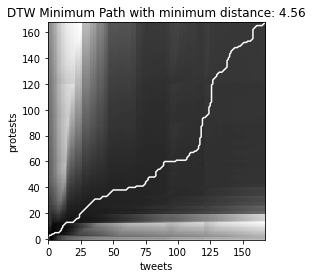

In [65]:
from dtw import dtw,accelerated_dtw

d1 = df['tweet_count'].interpolate().values
d2 = df['protest_count'].interpolate().values
d, cost_matrix, acc_cost_matrix, path = accelerated_dtw(d1,d2, dist='euclidean')

plt.imshow(acc_cost_matrix.T, origin='lower', cmap='gray', interpolation='nearest')
plt.plot(path[0], path[1], 'w')
plt.xlabel('tweets')
plt.ylabel('protests')
plt.title(f'DTW Minimum Path with minimum distance: {np.round(d,2)}')
plt.show()

### Granger Causality Analysis and Co-integration test
 
 Granger’s causality Tests the null hypothesis that the coefficients of past values in the regression equation is zero. In simpler terms, the past values of time series (x) do not cause the other series (y). So, if the p-value obtained from the test is lesser than the significance level of 0.05, then, you can safely reject the null hypothesis. This has been performed on original data-set.

In [130]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=1

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):

    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)

    for c in dataset.columns:
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')

            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value

    dataset.columns = [var + '_x' for var in variables]

    dataset.index = [var + '_y' for var in variables]

    return dataset

grangers_causality_matrix(df[df['state']=="USA"][["tweet_count", "protest_count"]], variables = df.columns[:-1])  

tweet_count_x  protest_count_x
tweet_count_y              1.0           0.6817
protest_count_y            0.0           1.0000

In [131]:
dfs = []
for state in df['state'].unique():
    data = df[df['state']==state]
    g_df = grangers_causality_matrix(data[["tweet_count", "protest_count"]], variables = data.columns[:-1])  
    g_df['state'] = state
    dfs.append(g_df)

granger_results = pd.concat(dfs)

In [133]:
granger_results.to_csv("../data/raw/processed/stat_tests/state_granger_results.csv")

In [217]:
print("For", len(granger_results[(granger_results['tweet_count_x']!=1)&(granger_results['tweet_count_x']==0)]), "states we can reject the null-hypothesis that tweet count does not cause protest count")

For 32 states we can reject the null-hypothesis that tweet count does not cause protest count


In [207]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import coint

var = []
test_stat = []
c95 = []
signif = []

def cointegration_test(df_data, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df_data,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
#     print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df_data.columns, traces, cvts):
#         print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)
        var.append(adjust(col))
        test_stat.append(adjust(round(trace,2), 9))
        c95.append(adjust(cvt, 8))
        signif.append(trace > cvt)
        
    coint_df = pd.DataFrame.from_dict({"variable":var, "test_statistic":test_stat, "C(95%)":c95, "signif":signif})  
    return coint_df



coint_df = cointegration_test(df[df['state']=="OK"][["tweet_count", "protest_count"]])
coint_df

variable test_statistic    C(95%)  signif
0    tweet_count      38.33      12.3212     True
1  protest_count      14.8       4.1296      True

In [198]:
var = []
test_stat = []
c95 = []
signif = []
state = []
dfs = []

for state in df['state'].unique():
    data = df[df['state']==state]
#     state.append(state)
#     coint = np.NaN
    coint_result = cointegration_test(data[["tweet_count", "protest_count"]])
    coint_result['state'] = state
#     print(coint.iloc[-2:, :])
    dfs.append(coint_result.iloc[-2:, :])
    
coint_df = pd.concat(dfs)

In [195]:
coint_df.to_csv("../data/raw/processed/stat_tests/cointegration_results.csv")

In [210]:
coint_df[coint_df['signif']==True]

variable test_statistic    C(95%)  signif state
0      tweet_count      24.64      12.3212     True    AK
1    protest_count      6.13       4.1296      True    AK
2      tweet_count      40.58      12.3212     True    AL
3    protest_count      6.68       4.1296      True    AL
4      tweet_count      43.85      12.3212     True    AR
..             ...            ...       ...     ...   ...
97   protest_count      11.8       4.1296      True    WI
98     tweet_count      32.16      12.3212     True    WV
100    tweet_count      32.56      12.3212     True    WY
102    tweet_count      52.21      12.3212     True   USA
103  protest_count      17.19      4.1296      True   USA

[89 rows x 5 columns]

In [205]:
# basic cointegration
coint(df[df['state']=="USA"]["tweet_count"], df[df['state']=="USA"]["protest_count"], trend='c', method='aeg', maxlag=None, autolag='aic', return_results=None)

(-2.1967408099987336,
 0.42604484183331315,
 array([-3.9632224 , -3.37296207, -3.06994394]))

### Vector Auto Regressive Model

In [200]:
n_obs=40
X_train, X_test = df[0:-n_obs], df[-n_obs:]
print(X_train.shape, X_test.shape)

(3249, 3) (40, 3)


In [203]:
nobs = 600
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)  # (119, 8)
print(df_test.shape)  # (4, 8)

(2689, 3)
(600, 3)


In [208]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")    

In [209]:
# ADF Test on each column
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "tweet_count" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.9927
 No. Lags Chosen       = 19
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "protest_count" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.7411
 No. Lags Chosen       = 19
 Critical value 1%     = -3.433
 Critical value 5%     = -2.863
 Critical value 10%    = -2.567
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.




ValueError: could not convert string to float: 'AK'

In [120]:
# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [121]:
model = VAR(df)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')

Lag Order = 1
AIC :  -11.616429391197299
BIC :  -11.50440566140987
FPE :  9.016794534452297e-06
HQIC:  -11.570961425059412 

Lag Order = 2
AIC :  -11.870073342673654
BIC :  -11.682604198796755
FPE :  6.996945317625991e-06
HQIC:  -11.793978363366035 

Lag Order = 3
AIC :  -12.08332019332248
BIC :  -11.819785425840006
FPE :  5.653598711676373e-06
HQIC:  -11.976342266545878 

Lag Order = 4
AIC :  -12.632448922462304
BIC :  -12.292219680384038
FPE :  3.265073896956618e-06
HQIC:  -12.49432869956276 

Lag Order = 5
AIC :  -12.763904574440872
BIC :  -12.346343197644867
FPE :  2.8634205020433643e-06
HQIC:  -12.594379231821941 

Lag Order = 6
AIC :  -13.076724037411564
BIC :  -12.581183884843403
FPE :  2.0948421452121146e-06
HQIC:  -12.875527214660911 

Lag Order = 7
AIC :  -13.310534635328885
BIC :  -12.736359908934265
FPE :  1.6587426271667715e-06
HQIC:  -13.077396372030023 

Lag Order = 8
AIC :  -13.975335533271256
BIC :  -13.321861097534068
FPE :  8.536664197620434e-07
HQIC:  -13.7099822044

C:\Users\Leonardo\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


In [122]:
x = model.select_order(maxlags=12)
x.summary()

<class 'statsmodels.iolib.table.SimpleTable'>

In [140]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 05, May, 2021
Time:                     03:11:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                   -11.5044
Nobs:                     167.000    HQIC:                  -11.5710
Log likelihood:           502.046    FPE:                9.01679e-06
AIC:                     -11.6164    Det(Omega_mle):     8.70136e-06
--------------------------------------------------------------------
Results for equation tweet_count
                      coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------
const                    0.004075         0.004468            0.912           0.362
L1.tweet_count           0.963001         0.050595           19.034           0.000
L1.protest_count        -0.008617         

In [141]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

tweet_count : 1.61
protest_count : 1.64


In [142]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df.values[-lag_order:]
forecast_input

1


array([[0.00598754, 0.        ]])

In [143]:
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_2d')
df_forecast

tweet_count_2d  protest_count_2d
date                                        
2020-10-26        0.009841         -0.004700
2020-10-27        0.013592         -0.004261
2020-10-28        0.017201         -0.002061
2020-10-29        0.020658          0.000682
2020-10-30        0.023962          0.003535
2020-10-31        0.027120          0.006344
2020-11-01        0.030137          0.009057
2020-11-02        0.033019          0.011660
2020-11-03        0.035772          0.014150
2020-11-04        0.038402          0.016529
2020-11-05        0.040913          0.018803
2020-11-06        0.043313          0.020975
2020-11-07        0.045604          0.023050
2020-11-08        0.047793          0.025032
2020-11-09        0.049884          0.026925

In [144]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [145]:
df_results = invert_transformation(df_train, df_forecast, second_diff=True)        
df_results

tweet_count_2d  protest_count_2d  tweet_count_1d  \
date                                                           
2020-10-26        0.009841         -0.004700        0.008970   
2020-10-27        0.013592         -0.004261        0.022563   
2020-10-28        0.017201         -0.002061        0.039764   
2020-10-29        0.020658          0.000682        0.060421   
2020-10-30        0.023962          0.003535        0.084384   
2020-10-31        0.027120          0.006344        0.111504   
2020-11-01        0.030137          0.009057        0.141642   
2020-11-02        0.033019          0.011660        0.174661   
2020-11-03        0.035772          0.014150        0.210433   
2020-11-04        0.038402          0.016529        0.248835   
2020-11-05        0.040913          0.018803        0.289748   
2020-11-06        0.043313          0.020975        0.333061   
2020-11-07        0.045604          0.023050        0.378665   
2020-11-08        0.047793          0.025032        0.426459   
2020-11-09        0.049884          0.026925        0.476343   

            tweet_count_forecast  protest_count_1d  protest_count_forecast  
date                                                                        
2020-10-26              0.011256         -0.030423               -0.025600  
2020-10-27              0.033819         -0.034684               -0.060284  
2020-10-28              0.073583         -0.036745               -0.097029  
2020-10-29              0.134004         -0.036063               -0.133092  
2020-10-30              0.218388         -0.032527               -0.165619  
2020-10-31              0.329892         -0.026184               -0.191803  
2020-11-01              0.471534         -0.017126               -0.208929  
2020-11-02              0.646195         -0.005467               -0.214396  
2020-11-03              0.856628          0.008683               -0.205713  
2020-11-04              1.105462          0.025212               -0.180501  
2020-11-05              1.395210          0.044015               -0.136486  
2020-11-06              1.728271          0.064990               -0.071496  
2020-11-07              2.106936          0.088040                0.016544  
2020-11-08              2.533395          0.113072                0.129616  
2020-11-09              3.009738          0.139997                0.269613

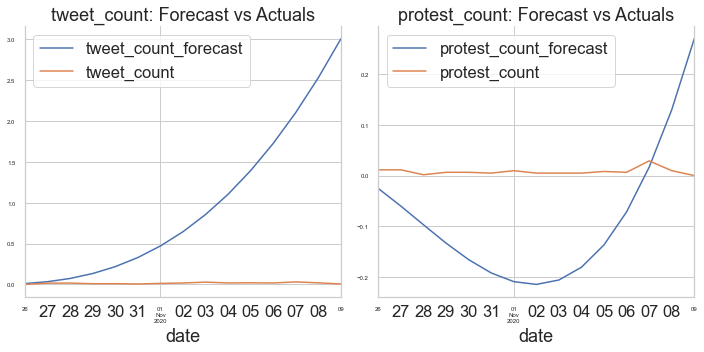

In [146]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2,  figsize=(10,5)) #dpi=150,
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

df

### Multivariate LSTM Forecast Model

### 1. Prepare data for modelling
We will frame the supervised learning problem as predicting the number of physical protests at the current day (t) given the number of physical protests and number of tweets at the prior time step.

In [174]:
# tweets_geo = gpd.read_file("../data/raw/processed/tweets_gdf_fs.geojson")
# protest data
# df_p = pd.read_excel("../data/raw/protests/USA_2020_2021_Feb12.xlsx")
# df_p['protest_count'] = 1
# df_p['EVENT_DATE'] = pd.to_datetime(df_p['EVENT_DATE'])
# df_p = df_p[(df_p['ASSOC_ACTOR_1'] == "BLM: Black Lives Matter")&(df_p['EVENT_DATE'] > "2020-05-25")]

In [295]:
from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, LSTM

 
# load dataset
dataset = df_p_t.iloc[:,3:]
values = dataset.values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = DataFrame(scaler.fit_transform(values))
scaled.columns = dataset.columns
# # frame as supervised learning
# reframed = series_to_supervised(scaled, 1, 1)
# # drop columns we don't want to predict
# reframed.drop(reframed.columns[[9,10,11,12,13,14,15]], axis=1, inplace=True)
scaled.head(10)

tweet_count  protest_count  protest_count_lag1  protest_count_lag2  \
0     0.045669       0.009646                 NaN                 NaN   
1     0.199820       0.020900            0.009646                 NaN   
2     0.370030       0.070740            0.020900            0.009646   
3     0.541355       0.221865            0.070740            0.020900   
4     0.585227       0.588424            0.221865            0.070740   
5     0.817652       0.744373            0.588424            0.221865   
6     0.799336       0.604502            0.744373            0.588424   
7     1.000000       0.673633            0.604502            0.744373   
8     0.727213       0.588424            0.673633            0.604502   
9     0.600196       0.508039            0.588424            0.673633   

   protest_count_lag3  protest_count_lag4  protest_count_lag5  \
0                 NaN                 NaN                 NaN   
1                 NaN                 NaN                 NaN   
2                 NaN                 NaN                 NaN   
3            0.009646                 NaN                 NaN   
4            0.020900            0.009646                 NaN   
5            0.070740            0.020900            0.009646   
6            0.221865            0.070740            0.020900   
7            0.588424            0.221865            0.070740   
8            0.744373            0.588424            0.221865   
9            0.604502            0.744373            0.588424   

   protest_count_lag6  protest_count_lag7  tweet_count_lag1  tweet_count_lag2  \
0                 NaN                 NaN               NaN               NaN   
1                 NaN                 NaN          0.045669               NaN   
2                 NaN                 NaN          0.199820          0.045669   
3                 NaN                 NaN          0.370030          0.199820   
4                 NaN                 NaN          0.541355          0.370030   
5                 NaN                 NaN          0.585227          0.541355   
6            0.009646                 NaN          0.817652          0.585227   
7            0.020900            0.009646          0.799336          0.817652   
8            0.070740            0.020900          1.000000          0.799336   
9            0.221865            0.070740          0.727213          1.000000   

   tweet_count_lag3  tweet_count_lag4  tweet_count_lag5  tweet_count_lag6  \
0               NaN               NaN               NaN               NaN   
1               NaN               NaN               NaN               NaN   
2               NaN               NaN               NaN               NaN   
3          0.045669               NaN               NaN               NaN   
4          0.199820          0.045669               NaN               NaN   
5          0.370030          0.199820          0.045669               NaN   
6          0.541355          0.370030          0.199820          0.045669   
7          0.585227          0.541355          0.370030          0.199820   
8          0.817652          0.585227          0.541355          0.370030   
9          0.799336          0.817652          0.585227          0.541355   

   tweet_count_lag7  
0               NaN  
1               NaN  
2               NaN  
3               NaN  
4               NaN  
5               NaN  
6               NaN  
7          0.045669  
8          0.199820  
9          0.370030

In [299]:
# split into train and test sets
p_lag = ""
t_lag = "" #"_lag1"
values = scaled[[f'tweet_count{t_lag}', f'protest_count{p_lag}']].values
n_train_days = 100
train = values[:n_train_days, :]
test = values[n_train_days:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)
print(f"Training: \tX.shape: {train_X.shape}, \tY.shape: {train_y.shape}")
print(f"Validation:\tX.shape: {test_X.shape}, \tY.shape: {test_y.shape}")

(100, 1, 1) (100,) (68, 1, 1) (68,)
Training: 	X.shape: (100, 1, 1), 	Y.shape: (100,)
Validation:	X.shape: (68, 1, 1), 	Y.shape: (68,)


In [270]:
# scaled[[f'tweet_count{t_lag}', f'protest_count{p_lag}']]

In [248]:
# train_X

### 2. Define and Fit Model
Now we can define and fit our LSTM model.

We will define the LSTM with 50 neurons in the first hidden layer and 1 neuron in the output layer for predicting pollution. The input shape will be 1 time step with 8 features.

We will use the Mean Absolute Error (MAE) loss function and the efficient Adam version of stochastic gradient descent.

The model will be fit for 50 training epochs with a batch size of 72. Remember that the internal state of the LSTM in Keras is reset at the end of each batch, so an internal state that is a function of a number of days may be helpful (try testing this).

Finally, we keep track of both the training and test loss during training by setting the validation_data argument in the fit() function. At the end of the run both the training and test loss are plotted.

In [283]:
# Function for model creation
# def FNNmodel(n_hidden_neurons=10, dropout_rate=0.1):
#   i = Input(shape=(T,))      
#   x = Dense(neurons, activation='sigmoid', name='Hidden_layer')(i)
#   x = Dropout(dropout_rate)(x)
#   x = Dense(1, activation='sigmoid', name='Output')(x)  
#   model = Model(i,x)
#   return model

def RNNmodel(n_hidden_neurons=10, cell_type='LSTM', dropout_rate=0.2):
    i = Input(shape=(train_X.shape[1], train_X.shape[2]))
    if cell_type == 'SimpleRNN':
        x = SimpleRNN(n_hidden_neurons, activation='tanh', return_sequences=False, name='SimpleRNN')(i)
    elif cell_type == 'LSTM':
        x = LSTM(n_hidden_neurons, activation='tanh', name='LSTM')(i)
    else:
        raise Exception("Error: Cell type not recognized! Choose between 'SimpleRNN','LSTM', or 'GRU'.")    
    x = Dropout(dropout_rate)(x)
    x = Dense(1, activation='sigmoid', name='Output')(x)
    model = Model(i,x)
    return model

In [278]:
train_X.shape[0], train_X.shape[1]

(100, 1)

In [227]:
Input(shape=(train_X.shape[0], train_X.shape[1]))

<tf.Tensor 'input_7:0' shape=(None, 100, 1) dtype=float32>

In [284]:
# ANN_type = ['SimpleRNN','LSTM']
# neurons = [10,25]
# dropout_rate = [0,0.25]
lr = 0.0001#[0.0001]
# batch_size = [16]

# all_combinations = list(itertools.product(*[ANN_type,neurons,dropout_rate,lr,batch_size]))
# print(pd.DataFrame(data=all_combinations, columns=['ann_type','neurons','dropout_rate','lr','batch_size']))
# model = RNNmodel(neurons, cell_type=ANN_type, dropout_rate=dropout_rate)
model = RNNmodel(50, cell_type="LSTM", dropout_rate=0)
model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])
model.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
LSTM (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
Output (Dense)               (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [304]:
import tensorflow
tensorflow.keras.backend.clear_session()
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam', metrics=['accuracy'])
# model.compile(loss='binary_crossentropy', optimizer=Adam(lr=lr), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 50)                10400     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


In [1]:
# fit network
history = model.fit(train_X, train_y, epochs=200, batch_size=10, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
# pyplot.plot(history.history['accuracy'], label='train')
# pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

NameError: name 'model' is not defined

In [187]:
# scaled[[f'tweet_count{lag}', f'protest_count{lag}']]